In [4]:
# Import the necessary libraries
from bs4 import BeautifulSoup
import pandas as pd

/var/folders/b5/j3081dhn2bqfqgnv92hk21nm0000gn/T/ipykernel_32963/3446577510.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
with open('kaohsiung.html') as f:
    soup = BeautifulSoup(f, 'html.parser')

In [7]:
df = pd.DataFrame(columns=['time', 'type', 'building', 'address','area','price', 'floor'])


tables = soup.find_all('table')

for table in tables:
    # Iterate through each row and extract data
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        if cols[0].text == "成交時間":
            next
        else:
            new_row= pd.DataFrame([{'time': cols[0].text, 'type': cols[1].text, 'building': cols[2].text, 'address': cols[3].text, 'area': cols[4].text, 'price': cols[5].text, 'floor': cols[6].text}])
            print(new_row)
            df = pd.concat([df, new_row], ignore_index=True)


df.head()
df.to_csv("kaohsiung.csv")            
    


         time  type building     address area    price  floor
0  2023/07/31  整層住家     電梯大樓  高雄市前金區成功一路  30坪  13,800元  6 / 7
         time type building     address    area    price  floor
0  2023/07/03   店面      透天厝  高雄市前金區大同一路  62.39坪  30,000元  1 / 4
         time type building     address    area    price  floor
0  2023/03/27   住店      透天厝  高雄市前金區文武二街  47.59坪  26,000元  1 / 3
         time type building     address    area    price  floor
0  2023/03/25   店面      透天厝  高雄市前金區文武二街  47.59坪  26,000元  1 / 4
         time type building     address    area    price  floor
0  2023/03/25   店面      透天厝  高雄市前金區文武二街  47.59坪  26,000元  1 / 4
         time type building     address    area    price  floor
0  2023/03/25   店面      透天厝  高雄市前金區文武二街  47.59坪  26,000元  1 / 4
         time type building     address    area    price    floor
0  2023/02/22   辦公     電梯大樓  高雄市前金區五福三路  22.71坪  23,000元  15 / 16
         time  type building    address  area   price  floor
0  2022/10/24  獨立套房     電梯大樓  高雄市前金區育才街  5.

In [9]:
df=pd.read_csv('kaohsiung.csv',index_col='id')
def convertPrice(price):
    price_str=price.replace(",","")
    price_int=int(price_str)
    print(price_int)
    return price_int


df['price']=df['price'].map(convertPrice)
print(df['price'])
df.to_csv('kaohsiung.csv')

13800
30000
26000
26000
26000
26000
23000
4500
4500
4500
17500
23000
23000
10000
4500
4500
17500
17500
17500
6000
23000
5000
24000
id
0     13800
1     30000
2     26000
3     26000
4     26000
5     26000
6     23000
7      4500
8      4500
9      4500
10    17500
11    23000
12    23000
13    10000
14     4500
15     4500
16    17500
17    17500
18    17500
19     6000
20    23000
21     5000
22    24000
Name: price, dtype: int64


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plt.rcParams['font.family']='Heiti TC'
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='area', ylabel='price'>

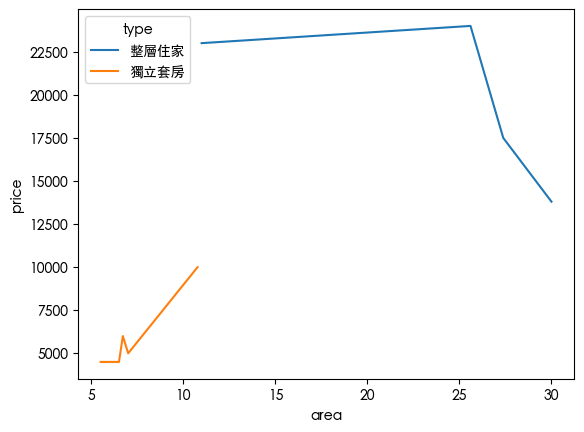

In [14]:
df_seleced=df.loc[(df['type']=='整層住家') | (df['type']=='雅房') | (df['type']=='分租套房') | (df['type']=='獨立套房') ]
sns.lineplot(x=df_seleced['area'],y=df_seleced['price'], hue=df_seleced['type'])

<Axes: xlabel='area', ylabel='price'>

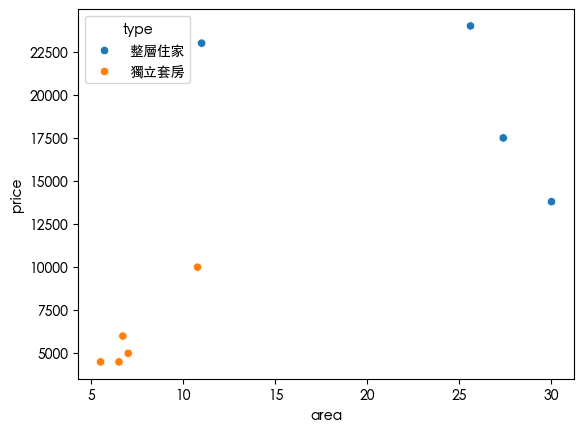

In [15]:
sns.scatterplot(x=df_seleced['area'], y=df_seleced['price'], hue=df_seleced['type'])

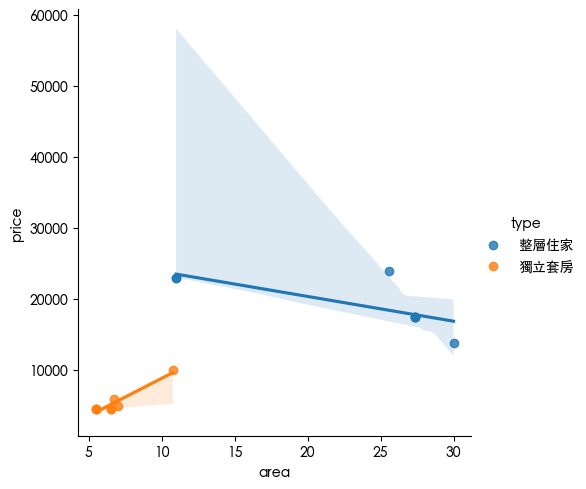

In [16]:
sns.lmplot(x="area", y="price", hue="type", data=df_seleced)